# <center> Choosing the best location for a high-end Asian Restaurant in Downtown Toronto<center>

### Table of contents

<ul>
    <li> I. Description of the business problem and discussion of the background. </li><br>
    <li> II. Description of the data and how it would be used to scout the best location. </li><br>
    <li> III.1: Methodology: Foursquare queries. </li><br>
    <li> III.2: Methodology: Other research and analysis. </li><br>
    <li> IV. Summary of results. </li> <br>
    <li> V. Discussion of results. </li><br>
    <li> VI. Conclusion / Recommendation. </li>
</ul>

### I. Description of the business problem and discussion of the background

An acclaimed chef is looking to open an Asian restaurant in Toronto city of Cananda. The chef has been in the restaurant industry for his entire life and is widely acclaimed for his culinary expertise and success in the restaurant industry in Asia. The chef is now looking to expand his restaurant business into Toronto. The new business venture will be a high-end culinary establishment that targets middle-income and well-off diners. 

In the restaurant industry, if someone says "location can make or break a restaurant", that would not be an exaggeration at all. One of the biggest, if not THE biggest, reasons that restaurants fail is poor location. 

After a few meetings with the chef, I have decided that a good location for this acclaimed chef's new restaurant must exhibit the following characteristics: <br>
<ul> 
    <li> User-friendly parking. It would be ideal that the restaurant has its own parking lot. </li>
    <li> Accessibility. The restaurant is located off a major roadway. </li>
    <li> Visibility. The restaurant can be easily seen from the streets. </li>
</ul>
 

Those are the basic requirements. Based on the information that the chef will be openning a high-end culinary establishment that targets young and middle-aged diners with income in the higher range, it would be good busines acumen that the restaurant is located at where the target market lives, works and/or plays. In addition to user-friendly parking, accessibility and visibility, the location should also exhibit the following attributes: <br>
<ul>
    <li> Minimum population is preferably about 12,000 within a 5-mile radius. </li>
    <li> Overall trade in the area is growing or stable. </li>
    <li> Retail support is within one mile of site. </li>
    <li> Ideal household income is $40,000 and above per year. </li>
    <li> Unemployment rate in the area is less than 10% </li>
    <li> Low crime rate. </li>
</ul>

Other factors to consider are: <br>
<ul>
    <li> Saturation level in the area. Has the area been saturated by Asian restaurants? Does it have additional appetite for a high-end Asian restaurant? </li>
    <li> Psychographics of the target market. For example, what would make them keep coming back? The pyschographics of target market tells the "why". </li>
</ul>

Location. Location. Location. Good locations forebode success. In this project, I will leverage the Foursquare location data as well as other data sources to scout the best location for this acclaimed chef's new high-end Asian restaurant. 

### II. Discriptions of the data and how it would be used to scout the best location:

#### A. Data analysis plan with Foursquare location data: description of the data and how it could be used to solve the problem at hand

<ul>
1. Search Foursquare data location to find out how many restaurants / Asian restaurants are within 1000-meter radius of the center of Toronto. <br> <br>
2. Visualize these restaurants on the map to see where they are located.
 </ul> <br>
The above earches will show the hot spots for restaurants, as well as areas that might have been saturated. We want to open the restaurant in an area that is associated with gourmet food, but we also try to situate it in an area that is already saturated. <br><br>
<ul>
3. Perform another Foursquare search to find out the trending venues in the candidate area. The new restaurant will target young, middle-aged customers with income in the higher range. Ideally, we want to situate the restaurant where the target market works, lives and / or plays. The trending venues in the candidate area, coupled with other research, will let us know whether the candidate location atracts the restaurant's target market.

#### B. Data analysis plan with other data sources:

There are other questions related to scouting out the best location for a restaurant that Foursquare location data does not answer, for example, demographic questions such as population density, unemployment rate, crime rate, business growth. These are important factors to consider when scouting the best location for a new restaurant. <br>

To answer these important demographic questions, I will leverage data from other sources such as:<br>
<ul>
    <li> The most recent census </li>
    <li> Salary information from www.payscale.com </li>
    <li> Internet search on Google about parking in Toronto. </li>
</ul>


### III.1: Methodology: Foursquare Location Data

In [16]:
# Import the necessary libaries for data analysis.

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


### III.1: Foursquare queries

In [17]:
# Define Foursquare credentials and version.

CLIENT_ID = 'PUE2QNNL3WRDSORF23CTZ1BWXSHE3F0MJ2TKL2TVKZGBYY00' # your Foursquare ID
CLIENT_SECRET = 'FFA5V2QDDOOYEYEWJJEGQWZ01BJ1F5W0BBEAGXUX4ZSKUQGA' # your Foursquare Secret
VERSION = '20200315'
LIMIT = 30

#### First Foursquare query: find Asian restaurants that are within 1km of the center of Toronto city.

In [18]:
# Get the latitude and longitude coordinates of Toronto city.

address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.653963, -79.387207.


In [19]:
# First Foursquare query to find the restaurants that are within 1km of [43.653963, -79.387207].

search_query = 'restaurant'
radius = 1000
print(search_query + ' .... OK!')

restaurant .... OK!


In [20]:
# Define the corresponding URL.

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=PUE2QNNL3WRDSORF23CTZ1BWXSHE3F0MJ2TKL2TVKZGBYY00&client_secret=FFA5V2QDDOOYEYEWJJEGQWZ01BJ1F5W0BBEAGXUX4ZSKUQGA&ll=43.653963,-79.387207&v=20200315&query=restaurant&radius=1000&limit=30'

In [21]:
# Send the GET request.

results = requests.get(url).json()

In [22]:
# Get relevant part of JSON and transform it into pandas dataframe.

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

dataframe

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,venuePage.id
0,4ad4c05ff964a52048f720e3,Hemispheres Restaurant & Bistro,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1584471379,False,110 Chestnut Street,43.654884,-79.385931,"[{'label': 'display', 'lat': 43.65488413420439...",145,M5G 1R3,CA,Toronto,ON,Canada,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]",NaN,NaN,NaN
1,4b223f5af964a520ba4424e3,Azure Restaurant & Bar,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1584471379,False,225 Front St W,43.644749,-79.385113,"[{'label': 'display', 'lat': 43.64474919591934...",1039,M5V 2X3,CA,Toronto,ON,Canada,[225 Front St W (in InterContinental Toronto C...,in InterContinental Toronto Centre,Entertainment District,136175835
2,4b266f05f964a520657b24e3,Goldstone Noodle Restaurant 金石,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",v-1584471379,False,266 Spadina Ave,43.652278,-79.398039,"[{'label': 'display', 'lat': 43.6522783893466,...",892,M5T 2E4,CA,Toronto,ON,Canada,"[266 Spadina Ave (at Willison Sq), Toronto ON ...",at Willison Sq,NaN,NaN
3,4ad4c060f964a5207ff720e3,Rol San Restaurant 龍笙棧,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",v-1584471379,False,323 Spadina Ave.,43.654318,-79.398650,"[{'label': 'display', 'lat': 43.65431754076345...",922,M5T 2E9,CA,Toronto,ON,Canada,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...",at D'Arcy St.,Kensington Market,NaN
4,4b074bb1f964a52077fb22e3,New Sky Restaurant 小沙田食家,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1584471379,False,353 Spadina Ave.,43.655337,-79.398897,"[{'label': 'display', 'lat': 43.65533674412141...",953,M5T 2G3,CA,Toronto,ON,Canada,"[353 Spadina Ave., Toronto ON M5T 2G3, Canada]",NaN,NaN,NaN
5,4ae29812f964a520288f21e3,Swatow Restaurant 汕頭小食家,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1584471379,False,309 Spadina Ave.,43.653866,-79.398334,"[{'label': 'display', 'lat': 43.65386562507761...",896,M5T 2E6,CA,Toronto,ON,Canada,[309 Spadina Ave. (btwn Dundas St. W & D'Arcy ...,btwn Dundas St. W & D'Arcy St.,NaN,NaN
6,4aef8854f964a5201cd921e3,Aroma Fine Indian Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1584471379,False,287 King St. W,43.646463,-79.389644,"[{'label': 'display', 'lat': 43.64646252150344...",857,M5V 1J5,CA,Toronto,ON,Canada,"[287 King St. W (at John St.), Toronto ON M5V ...",at John St.,NaN,NaN
7,4d06c1ccc2e53704428cc567,North-East Chinese Restaurant 華北美食,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1584471379,False,476 Dundas St.,43.653185,-79.396677,"[{'label': 'display', 'lat': 43.6531846832903,...",767,NaN,CA,Toronto,ON,Canada,"[476 Dundas St. (Huron), Toronto ON, Canada]",Huron,NaN,NaN
8,4b072e9df964a52009f922e3,Sky Dragon Chinese Restaurant 龍翔酒樓,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",v-1584471379,False,280 Spadina Ave.,43.652783,-79.398174,"[{'label': 'display', 'lat': 43.65278331265585...",892,NaN,CA,Toronto,ON,Canada,"[280 Spadina Ave. (at Dundas St. W.), Toronto ...",at Dundas St. W.,NaN,NaN
9,4ad4c05cf964a52006f620e3,Victoria's Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1584471379,False,37 King Street East,43.649298,-79.376431,"[{'label': 'display', 'lat': 43.64929834396347...",1011,M5C 1E9,CA,Toronto,ON,Canada,[37 King Street East (at Le Meridien King Edwa...,at Le Meridien King Edward Hotel,NaN,498556908


In [23]:
# Define information of interest and filter dataframe.

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered.head()

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,43.654884,-79.385931,"[{'label': 'display', 'lat': 43.65488413420439...",145,M5G 1R3,CA,Toronto,ON,Canada,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]",NaN,NaN,4ad4c05ff964a52048f720e3
1,Azure Restaurant & Bar,Restaurant,225 Front St W,43.644749,-79.385113,"[{'label': 'display', 'lat': 43.64474919591934...",1039,M5V 2X3,CA,Toronto,ON,Canada,[225 Front St W (in InterContinental Toronto C...,in InterContinental Toronto Centre,Entertainment District,4b223f5af964a520ba4424e3
2,Goldstone Noodle Restaurant 金石,Noodle House,266 Spadina Ave,43.652278,-79.398039,"[{'label': 'display', 'lat': 43.6522783893466,...",892,M5T 2E4,CA,Toronto,ON,Canada,"[266 Spadina Ave (at Willison Sq), Toronto ON ...",at Willison Sq,NaN,4b266f05f964a520657b24e3
3,Rol San Restaurant 龍笙棧,Dim Sum Restaurant,323 Spadina Ave.,43.654318,-79.398650,"[{'label': 'display', 'lat': 43.65431754076345...",922,M5T 2E9,CA,Toronto,ON,Canada,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...",at D'Arcy St.,Kensington Market,4ad4c060f964a5207ff720e3
4,New Sky Restaurant 小沙田食家,Chinese Restaurant,353 Spadina Ave.,43.655337,-79.398897,"[{'label': 'display', 'lat': 43.65533674412141...",953,M5T 2G3,CA,Toronto,ON,Canada,"[353 Spadina Ave., Toronto ON M5T 2G3, Canada]",NaN,NaN,4b074bb1f964a52077fb22e3
5,Swatow Restaurant 汕頭小食家,Chinese Restaurant,309 Spadina Ave.,43.653866,-79.398334,"[{'label': 'display', 'lat': 43.65386562507761...",896,M5T 2E6,CA,Toronto,ON,Canada,[309 Spadina Ave. (btwn Dundas St. W & D'Arcy ...,btwn Dundas St. W & D'Arcy St.,NaN,4ae29812f964a520288f21e3
6,Aroma Fine Indian Restaurant,Indian Restaurant,287 King St. W,43.646463,-79.389644,"[{'label': 'display', 'lat': 43.64646252150344...",857,M5V 1J5,CA,Toronto,ON,Canada,"[287 King St. W (at John St.), Toronto ON M5V ...",at John St.,NaN,4aef8854f964a5201cd921e3
7,North-East Chinese Restaurant 華北美食,Chinese Restaurant,476 Dundas St.,43.653185,-79.396677,"[{'label': 'display', 'lat': 43.6531846832903,...",767,NaN,CA,Toronto,ON,Canada,"[476 Dundas St. (Huron), Toronto ON, Canada]",Huron,NaN,4d06c1ccc2e53704428cc567
8,Sky Dragon Chinese Restaurant 龍翔酒樓,Dim Sum Restaurant,280 Spadina Ave.,43.652783,-79.398174,"[{'label': 'display', 'lat': 43.65278331265585...",892,NaN,CA,Toronto,ON,Canada,"[280 Spadina Ave. (at Dundas St. W.), Toronto ...",at Dundas St. W.,NaN,4b072e9df964a52009f922e3
9,Victoria's Restaurant,Restaurant,37 King Street East,43.649298,-79.376431,"[{'label': 'display', 'lat': 43.64929834396347...",1011,M5C 1E9,CA,Toronto,ON,Canada,[37 King Street East (at Le Meridien King Edwa...,at Le Meridien King Edward Hotel,NaN,4ad4c05cf964a52006f620e3


In [24]:
# Get the names of Asian restaurants that are within 2km of center of Toronto.

list1=dataframe_filtered[["name","lat","lng","address","distance"]]
list1

,name,lat,lng,address,distance
0,Hemispheres Restaurant & Bistro,43.654884,-79.385931,110 Chestnut Street,145
1,Azure Restaurant & Bar,43.644749,-79.385113,225 Front St W,1039
2,Goldstone Noodle Restaurant 金石,43.652278,-79.398039,266 Spadina Ave,892
3,Rol San Restaurant 龍笙棧,43.654318,-79.398650,323 Spadina Ave.,922
4,New Sky Restaurant 小沙田食家,43.655337,-79.398897,353 Spadina Ave.,953
5,Swatow Restaurant 汕頭小食家,43.653866,-79.398334,309 Spadina Ave.,896
6,Aroma Fine Indian Restaurant,43.646463,-79.389644,287 King St. W,857
7,North-East Chinese Restaurant 華北美食,43.653185,-79.396677,476 Dundas St.,767
8,Sky Dragon Chinese Restaurant 龍翔酒樓,43.652783,-79.398174,280 Spadina Ave.,892
9,Victoria's Restaurant,43.649298,-79.376431,37 King Street East,1011


The query above only shows culinary establishments that have the word "restaurant" in their names. There are other culinary establishments that do not have the word "restaurant" in their names are not returned. So, we will perform another query with "asian" as the keyword.

In [25]:
# First Foursquare query to find the restaurants that are within 1km of [43.653963, -79.387207].

search_query = 'asian'
radius = 1000


url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)


results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# Define information of interest and filter dataframe.

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered2 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]

#dataframe_filtered.head()

dataframe_filtered2

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Asian Legend 味香村,Chinese Restaurant,418 Dundas St W,btwn Beverley & Huron St,43.653603,-79.395047,"[{'label': 'display', 'lat': 43.65360271388312...",632,M5T 1G7,CA,Toronto,ON,Canada,"[418 Dundas St W (btwn Beverley & Huron St), T...",NaN,4adb5472f964a520fc2521e3
1,Fine Asian Bowl,Vietnamese Restaurant,271 Yonge St.,btwn Dundas St. E & Shuter St.,43.655387,-79.380326,"[{'label': 'display', 'lat': 43.6553866, 'lng'...",576,M5B 1N8,CA,Toronto,ON,Canada,[271 Yonge St. (btwn Dundas St. E & Shuter St....,NaN,4aea2b14f964a520ebb921e3
2,Fusia Asian Kitchen,Food Court,NaN,Bay and Dundas,43.656170,-79.383549,"[{'label': 'display', 'lat': 43.65617042572259...",383,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4bb0feb7f964a52021713ce3
3,SenseAsian Pan-Asian Resto,Asian Restaurant,40 King St W,NaN,43.649610,-79.378912,"[{'label': 'display', 'lat': 43.64961044882256...",825,NaN,CA,Toronto,ON,Canada,"[40 King St W, Toronto ON, Canada]",NaN,4dd3d24345dd98b61e74f6af
4,Lee Chen Asian Bistro,Asian Restaurant,214 King St W,Simcoe St,43.647010,-79.386536,"[{'label': 'display', 'lat': 43.64700977986747...",775,M5H 3S6,CA,Toronto,ON,Canada,"[214 King St W (Simcoe St), Toronto ON M5H 3S6...","Entertainment District, Toronto, ON",582e3fa85e56b4259dc5f751
5,East Restaurant Asian Street Flair,Asian Restaurant,240 Queen Street West,Queen and John,43.649985,-79.390563,"[{'label': 'display', 'lat': 43.64998452583986...",518,M5v1z7,CA,Toronto,ON,Canada,"[240 Queen Street West (Queen and John), Toron...",NaN,4ae31ac7f964a520799021e3
6,Lotus Leaf Asian Cuisine,Asian Restaurant,200 Elizabeth,Elizabeth Ave & University,43.659216,-79.389354,"[{'label': 'display', 'lat': 43.65921571056295...",609,M5G,CA,Toronto,ON,Canada,"[200 Elizabeth (Elizabeth Ave & University), T...",NaN,4c62e74a79d1e21e7340d715
7,Asian Community AIDS Services (ACAS),Office,"260 Spadina Ave, Suite 410",at Cameron Ave.,43.651991,-79.397893,"[{'label': 'display', 'lat': 43.65199101292225...",888,M5T 2E4,CA,Toronto,ON,Canada,"[260 Spadina Ave, Suite 410 (at Cameron Ave.),...",NaN,4c1a971cb9f876b0e1e57846
8,Asian Gourmet,Chinese Restaurant,NaN,NaN,43.649288,-79.378183,"[{'label': 'display', 'lat': 43.649288, 'lng':...",893,NaN,CA,NaN,NaN,Canada,[Canada],NaN,4c1a5be68b3aa5932f7a955f
9,Yulla Asian Fusion Restaurant,Asian Restaurant,NaN,NaN,43.651587,-79.379232,"[{'label': 'display', 'lat': 43.651587, 'lng':...",694,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4de827e4d4c0faa56428a51a


The second query did return some culinary establishments that were not returned by the first query. 

In [26]:
# Get the names of the asian food culinary establishments returned by the second query
list2=dataframe_filtered2[["name","lat","lng", "address","distance"]]
list2

,name,lat,lng,address,distance
0,Asian Legend 味香村,43.653603,-79.395047,418 Dundas St W,632
1,Fine Asian Bowl,43.655387,-79.380326,271 Yonge St.,576
2,Fusia Asian Kitchen,43.656170,-79.383549,NaN,383
3,SenseAsian Pan-Asian Resto,43.649610,-79.378912,40 King St W,825
4,Lee Chen Asian Bistro,43.647010,-79.386536,214 King St W,775
5,East Restaurant Asian Street Flair,43.649985,-79.390563,240 Queen Street West,518
6,Lotus Leaf Asian Cuisine,43.659216,-79.389354,200 Elizabeth,609
7,Asian Community AIDS Services (ACAS),43.651991,-79.397893,"260 Spadina Ave, Suite 410",888
8,Asian Gourmet,43.649288,-79.378183,NaN,893
9,Yulla Asian Fusion Restaurant,43.651587,-79.379232,NaN,694


We are going to concatenate "name1" and "name2" together to find out how many asian restaurants are within 1000 meters of radius.

In [27]:
# concatenate 'name' and 'name2'
frames=[list1, list2]
combined_list=pd.concat(frames)

# Drop the duplicates in case there is any. The first search returned only establishments with the word "restaurants". 
# The second returned establishments with the word "asian". There could be establishments with the phrase "asian restaurant"
  # that showed up in the results of both queries. 
    
combined_list.drop_duplicates(keep='first')

,name,lat,lng,address,distance
0,Hemispheres Restaurant & Bistro,43.654884,-79.385931,110 Chestnut Street,145
1,Azure Restaurant & Bar,43.644749,-79.385113,225 Front St W,1039
2,Goldstone Noodle Restaurant 金石,43.652278,-79.398039,266 Spadina Ave,892
3,Rol San Restaurant 龍笙棧,43.654318,-79.398650,323 Spadina Ave.,922
4,New Sky Restaurant 小沙田食家,43.655337,-79.398897,353 Spadina Ave.,953
5,Swatow Restaurant 汕頭小食家,43.653866,-79.398334,309 Spadina Ave.,896
6,Aroma Fine Indian Restaurant,43.646463,-79.389644,287 King St. W,857
7,North-East Chinese Restaurant 華北美食,43.653185,-79.396677,476 Dundas St.,767
8,Sky Dragon Chinese Restaurant 龍翔酒樓,43.652783,-79.398174,280 Spadina Ave.,892
9,Victoria's Restaurant,43.649298,-79.376431,37 King Street East,1011


The duplicates are droped. Reset the index.

In [28]:
combined_list=pd.DataFrame(combined_list.reset_index(drop=True))
combined_list

,name,lat,lng,address,distance
0,Hemispheres Restaurant & Bistro,43.654884,-79.385931,110 Chestnut Street,145
1,Azure Restaurant & Bar,43.644749,-79.385113,225 Front St W,1039
2,Goldstone Noodle Restaurant 金石,43.652278,-79.398039,266 Spadina Ave,892
3,Rol San Restaurant 龍笙棧,43.654318,-79.398650,323 Spadina Ave.,922
4,New Sky Restaurant 小沙田食家,43.655337,-79.398897,353 Spadina Ave.,953
5,Swatow Restaurant 汕頭小食家,43.653866,-79.398334,309 Spadina Ave.,896
6,Aroma Fine Indian Restaurant,43.646463,-79.389644,287 King St. W,857
7,North-East Chinese Restaurant 華北美食,43.653185,-79.396677,476 Dundas St.,767
8,Sky Dragon Chinese Restaurant 龍翔酒樓,43.652783,-79.398174,280 Spadina Ave.,892
9,Victoria's Restaurant,43.649298,-79.376431,37 King Street East,1011


There are 41 entries in total, with one that is clearly not a culinary establishment, Asian Community AIDS Services (ACAS). We are going drop that establishment.

In [29]:
combined_list.drop(combined_list.index[37], inplace=True)
combined_list.reset_index(drop=True)

,name,lat,lng,address,distance
0,Hemispheres Restaurant & Bistro,43.654884,-79.385931,110 Chestnut Street,145
1,Azure Restaurant & Bar,43.644749,-79.385113,225 Front St W,1039
2,Goldstone Noodle Restaurant 金石,43.652278,-79.398039,266 Spadina Ave,892
3,Rol San Restaurant 龍笙棧,43.654318,-79.398650,323 Spadina Ave.,922
4,New Sky Restaurant 小沙田食家,43.655337,-79.398897,353 Spadina Ave.,953
5,Swatow Restaurant 汕頭小食家,43.653866,-79.398334,309 Spadina Ave.,896
6,Aroma Fine Indian Restaurant,43.646463,-79.389644,287 King St. W,857
7,North-East Chinese Restaurant 華北美食,43.653185,-79.396677,476 Dundas St.,767
8,Sky Dragon Chinese Restaurant 龍翔酒樓,43.652783,-79.398174,280 Spadina Ave.,892
9,Victoria's Restaurant,43.649298,-79.376431,37 King Street East,1011


The queries together returned 40 restaurants with in 1000 meters of the center of the city.

In [31]:
latitude=43.653963
longitude=-79.387207
# create map of Manhattan using latitude and longitude values
restaurants = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(combined_list['lat'], combined_list['lng'], combined_list['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(restaurants)  
    
restaurants


The blue dots are the restaurants. To see the name of the restaurant, hover the cursor over the dot and click on it.

From the map, we see that the restaurants are spread in Fashion District, Financial District, Garden District, Kensington Market, Discovery District, Queen's Park, Chinatown, Little Tokyo. With most of them near Chinatown, Little Tokyo. This tells us that Downtown Toronto is a culinary hot spot. A good location candidate for a new restaurant.

We want to open the new restaurant in an area that that people associate with gourmet food and virbant social life, an area the restaurant's target market works, live and/or plays. At the same time, we also do not want to open the restaurant in an area that is already saturated with restaurants or people have little appetite for another high-end asian restaurant. Looking at the maps, it seems that the Financial District and Entertainment District in downtown Toronto are good location choices.

We are not going to find out what venues are trending in Financial District.

In [32]:
lattitude=43.6479
longitude=-79.3818
VERSION="20200316"

Limit =15
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

import requests

results = requests.get(url).json()

items = results['response']['groups'][0]['items']
items[0]

dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,LUSH,Cosmetics Shop,"220 Yonge St, Unit B215-A",in Toronto Eaton Centre,43.653557,-79.380400,"[{'label': 'display', 'lat': 43.653557, 'lng':...",121,M5B 2H1,CA,Toronto,ON,Canada,"[220 Yonge St, Unit B215-A (in Toronto Eaton C...",NaN,4bd0b30d41b9ef3b8fa0fae5
1,UNIQLO ユニクロ,Clothing Store,220 Yonge St,at Dundas St W,43.655910,-79.380641,"[{'label': 'display', 'lat': 43.65591027779457...",236,M5B 2H1,CA,Toronto,ON,Canada,"[220 Yonge St (at Dundas St W), Toronto ON M5B...",Downtown Toronto,57eda381498ebe0e6ef40972
2,Ed Mirvish Theatre,Theater,244 Victoria St.,btwn Dundas St E and Shuter St,43.655102,-79.379768,"[{'label': 'display', 'lat': 43.65510156732105...",207,M5B 1V8,CA,Toronto,ON,Canada,[244 Victoria St. (btwn Dundas St E and Shuter...,NaN,4ad4c062f964a520c5f720e3
3,Indigo,Bookstore,220 Yonge St,NaN,43.653515,-79.380696,"[{'label': 'display', 'lat': 43.65351471121164...",101,M5B 2H1,CA,Toronto,ON,Canada,"[220 Yonge St, Toronto ON M5B 2H1, Canada]",Downtown Yonge,4b2a6eb8f964a52012a924e3
4,Nathan Phillips Square,Plaza,100 Queen St W,at Bay St,43.652270,-79.383516,"[{'label': 'display', 'lat': 43.65227047322295...",233,M5H 2N1,CA,Toronto,ON,Canada,"[100 Queen St W (at Bay St), Toronto ON M5H 2N...",NaN,4ad4c05ef964a520a6f620e3
5,Downtown Toronto,Neighborhood,NaN,NaN,43.653232,-79.385296,"[{'label': 'display', 'lat': 43.65323167517444...",293,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,5227bb01498e17bf485e6202
6,Elgin And Winter Garden Theatres,Theater,189 Yonge St,btwn Queen St E & Shuter St,43.653394,-79.378507,"[{'label': 'display', 'lat': 43.65339379601958...",272,M5B 2H1,CA,Toronto,ON,Canada,"[189 Yonge St (btwn Queen St E & Shuter St), T...",NaN,4ad4c062f964a520b5f720e3
7,CF Toronto Eaton Centre,Shopping Mall,220 Yonge St,btwn Queen & Dundas,43.654540,-79.380677,NaN,110,M5B 2H1,CA,Toronto,ON,Canada,"[220 Yonge St (btwn Queen & Dundas), Toronto O...","Downtown Toronto, Toronto, ON",4ad77a12f964a520260b21e3
8,Eggspectation Bell Trinity Square,Breakfast Spot,483 Bay Street,Albert Street,43.653144,-79.381980,"[{'label': 'display', 'lat': 43.65314383888587...",92,M5G 2C9,CA,Toronto,ON,Canada,"[483 Bay Street (Albert Street), Toronto ON M5...",NaN,537773d1498e74a75bb75c1e
9,JOEY Eaton Centre,Restaurant,1 Dundas St W,NaN,43.655404,-79.381929,"[{'label': 'display', 'lat': 43.65540379999999...",160,M5G 1Z3,CA,Toronto,ON,Canada,"[1 Dundas St W, Toronto ON M5G 1Z3, Canada]",NaN,59246b5aad1789316b35d66c


In [33]:
category1=dataframe_filtered[["categories"]]
category1=category1.rename(columns={"categories": "Financial District Trending Venue Categories"}, errors="raise")
category1

,Financial District Trending Venue Categories
0,Cosmetics Shop
1,Clothing Store
2,Theater
3,Bookstore
4,Plaza
5,Neighborhood
6,Theater
7,Shopping Mall
8,Breakfast Spot
9,Restaurant


Trending venues in the Entertainment District.

In [34]:
lattitude=43.6427
longitude=-79.3888
VERSION="20200316"

Limit =15
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

import requests

results = requests.get(url).json()

items = results['response']['groups'][0]['items']
items[0]

dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Karine's,Breakfast Spot,109 McCaul St.,at Dundas St. W,43.653699,-79.390743,"[{'label': 'display', 'lat': 43.65369892831852...",159,M5T 3K5,CA,Toronto,ON,Canada,"[109 McCaul St. (at Dundas St. W), Toronto ON ...",NaN,4c90c810ae96a093599f9d46
1,Downtown Toronto,Neighborhood,NaN,NaN,43.653232,-79.385296,"[{'label': 'display', 'lat': 43.65323167517444...",293,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,5227bb01498e17bf485e6202
2,The Library Specialty Coffee,Coffee Shop,281 Dundas St West,St Patrick And Dundas St W,43.654413,-79.390902,"[{'label': 'display', 'lat': 43.65441282740799...",176,M5T 2W5,CA,Toronto,ON,Canada,[281 Dundas St West (St Patrick And Dundas St ...,NaN,5a6b737b35f98359eed11974
3,Manpuku まんぷく,Japanese Restaurant,105 McCaul St. Unit 29-31,at Dundas St. W.,43.653612,-79.390613,"[{'label': 'display', 'lat': 43.65361241179293...",151,M5T 2X4,CA,Toronto,ON,Canada,"[105 McCaul St. Unit 29-31 (at Dundas St. W.),...",NaN,4ad9f607f964a520691c21e3
4,Aboveground Art Supplies,Arts & Crafts Store,74 McCaul St,Dundas St.,43.652646,-79.390925,"[{'label': 'display', 'lat': 43.65264564807000...",225,M5T 3K2,CA,Toronto,ON,Canada,"[74 McCaul St (Dundas St.), Toronto ON M5T 3K2...",NaN,4adf3c01f964a5208f7821e3
5,Art Gallery of Ontario,Art Gallery,317 Dundas St W,at Beverley St,43.654003,-79.392922,"[{'label': 'display', 'lat': 43.65400286033738...",332,M5T 1G4,CA,Toronto,ON,Canada,"[317 Dundas St W (at Beverley St), Toronto ON ...",NaN,4ad4c05ef964a520daf620e3
6,Ontario College of Art and Design University (...,University,100 McCaul St,at Dundas St W,43.652803,-79.391074,"[{'label': 'display', 'lat': 43.65280251171013...",224,M5T 1W1,CA,Toronto,ON,Canada,"[100 McCaul St (at Dundas St W), Toronto ON M5...",NaN,4ad4c064f964a52065f820e3
7,Provo Food Bar,Tapas Restaurant,308 Dundas Street West,McCaul,43.654293,-79.391788,"[{'label': 'display', 'lat': 43.65429312397438...",243,M5T 1G4,CA,Toronto,ON,Canada,"[308 Dundas Street West (McCaul), Toronto ON M...",NaN,566f1451498ed44bec09c4f2
8,Japango,Sushi Restaurant,122 Elizabeth St.,at Dundas St. W,43.655268,-79.385165,"[{'label': 'display', 'lat': 43.65526771691681...",326,M5G 1P5,CA,Toronto,ON,Canada,"[122 Elizabeth St. (at Dundas St. W), Toronto ...",NaN,4ae7b27df964a52068ad21e3
9,Rolltation,Japanese Restaurant,207 Dundas St W,at University Ave,43.654918,-79.387424,"[{'label': 'display', 'lat': 43.65491791857301...",153,M5G 1C8,CA,Toronto,ON,Canada,"[207 Dundas St W (at University Ave), Toronto ...",NaN,5773f01f498e98371390bdfd


In [35]:
category2=dataframe_filtered[["categories"]]
category2=category2.rename(columns={"categories": "Entertainment District Trending Venue Categories"}, errors="raise")
category2

,Entertainment District Trending Venue Categories
0,Breakfast Spot
1,Neighborhood
2,Coffee Shop
3,Japanese Restaurant
4,Arts & Crafts Store
5,Art Gallery
6,University
7,Tapas Restaurant
8,Sushi Restaurant
9,Japanese Restaurant


In [36]:
category = pd.concat([category1, category2], axis=1, sort=False)
category

,Financial District Trending Venue Categories,Entertainment District Trending Venue Categories
0,Cosmetics Shop,Breakfast Spot
1,Clothing Store,Neighborhood
2,Theater,Coffee Shop
3,Bookstore,Japanese Restaurant
4,Plaza,Arts & Crafts Store
5,Neighborhood,Art Gallery
6,Theater,University
7,Shopping Mall,Tapas Restaurant
8,Breakfast Spot,Sushi Restaurant
9,Restaurant,Japanese Restaurant


In [ ]:
Restaurants2=category.to_excel(r'C:\Users\kensh\Documents\Mis\Continue Education\Cousera\IBM Data Science Professional Certificate\Toronto Post Codes.xlsx', index=False,encoding='utf-8')

A side-by-side comparison shows that the trending venue categories in the Financial District are mostly businesses and shops, while the trending venue categories in the Entertainment District are mostly food, entertainment and recreation.

We would like to open the high-end asian restaurant at where the target market lives, works and/plays. Right now, it appears that the Financial District is where the target market works, while the Entertainment District is where the target market plays and relaxes.

Besides location and target market, competition is also an important factor to consider. As mentioned before, we do not want to open the new restaurant in an area that is saturated already or where competition is too fierce.

Let's find out how many restaurants are in the Financial District.

In [37]:
lattitude=43.6479
longitude=-79.3818
VERSION="20200316"

search_query = 'restaurant'
radius = 500


url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)


results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# Define information of interest and filter dataframe.

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered3 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered3['categories'] = dataframe_filtered3.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered3.columns = [column.split('.')[-1] for column in dataframe_filtered3.columns]

#dataframe_filtered.head()

dataframe_filtered3

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,43.654884,-79.385931,"[{'label': 'display', 'lat': 43.65488413420439...",348,M5G 1R3,CA,Toronto,ON,Canada,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]",NaN,NaN,4ad4c05ff964a52048f720e3
1,Richtree Natural Market Restaurants,Restaurant,14 Queen St W,43.652614,-79.380231,"[{'label': 'display', 'lat': 43.65261436174172...",196,M5H 3X4,CA,Toronto,ON,Canada,"[14 Queen St W, Toronto ON M5H 3X4, Canada]",NaN,NaN,4b295e10f964a520ba9d24e3
2,The Senator Restaurant,Diner,249 Victoria Street,43.655641,-79.379199,"[{'label': 'display', 'lat': 43.65564091455335...",280,M5B 1T8,CA,Toronto,ON,Canada,[249 Victoria Street (btwn Dundas St E and Shu...,btwn Dundas St E and Shuter St,NaN,4ad7929cf964a520500c21e3
3,Hendricks Restaurant & Bar,Restaurant,Yonge And Queen,43.653415,-79.379698,"[{'label': 'display', 'lat': 43.65341542752959...",179,M5G 2H6,CA,Toronto,ON,Canada,"[Yonge And Queen (Queen St), Toronto ON M5G 2H...",Queen St,NaN,5a8b24b2018cbb6c4ca70dae
4,Kyoto House Japanese Restaurant,Sushi Restaurant,143 Dundas St. West,43.655381,-79.385270,"[{'label': 'display', 'lat': 43.65538110598594...",320,NaN,CA,Toronto,ON,Canada,"[143 Dundas St. West, Toronto ON, Canada]",NaN,NaN,4ae4b055f964a520229d21e3
5,Yueh Tung Chinese Restaurant,Chinese Restaurant,126 Elizabeth St.,43.655281,-79.385337,"[{'label': 'display', 'lat': 43.65528126342919...",320,NaN,CA,Toronto,ON,Canada,"[126 Elizabeth St. (Dundas St.), Toronto ON, C...",Dundas St.,NaN,52a7ae41498eed3af4d0a3fa
6,Akashiro Japanese Restaurant & Bar,Sushi Restaurant,220 Yonge St.,43.655965,-79.380541,"[{'label': 'display', 'lat': 43.65596504293232...",244,NaN,CA,Toronto,ON,Canada,[220 Yonge St. (in Toronto Eaton Centre Urban ...,in Toronto Eaton Centre Urban Eatery,NaN,4fbbb3ace4b01e39077b4d55
7,Hong Shing Chinese Restaurant,Chinese Restaurant,195 Dundas St W,43.654925,-79.387089,"[{'label': 'display', 'lat': 43.65492521335936...",439,M5G 1C7,CA,Toronto,ON,Canada,"[195 Dundas St W (at University Ave), Toronto ...",at University Ave,NaN,4b2027b5f964a520f82d24e3
8,Castries Bar & Five Way Restaurant,Caribbean Restaurant,NaN,43.654728,-79.380928,"[{'label': 'display', 'lat': 43.65472793579101...",110,NaN,CA,NaN,NaN,Canada,[Canada],NaN,NaN,53ae6660498e1ac3c1282743
9,Cru Restaurant,Restaurant,100 Yonge St,43.649820,-79.378350,"[{'label': 'display', 'lat': 43.64982, 'lng': ...",538,M5C 2W1,CA,Toronto,ON,Canada,"[100 Yonge St (Yonge and King), Toronto ON M5C...",Yonge and King,Financial District,5c636fa1492814002c0cb117


In [45]:
Restaurant3=dataframe_filtered3.to_excel(r'C:\Users\kensh\Documents\Mis\Continue Education\Cousera\IBM Data Science Professional Certificate\Restaurants3.xlsx', index=False,encoding='utf-8')

Let's find out how many entries will be returned with the keyword search "restaurant" in the Entertainment District.

In [38]:
lattitude=43.6427
longitude=-79.3888
VERSION="20200316"

search_query = 'restaurant'
radius = 500


url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)


results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# Define information of interest and filter dataframe.

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered4= dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered4['categories'] = dataframe_filtered4.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered4.columns = [column.split('.')[-1] for column in dataframe_filtered4.columns]

#dataframe_filtered.head()

dataframe_filtered4

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,43.654884,-79.385931,"[{'label': 'display', 'lat': 43.65488413420439...",252,M5G 1R3,CA,Toronto,ON,Canada,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]",NaN,4ad4c05ff964a52048f720e3
1,North-East Chinese Restaurant 華北美食,Chinese Restaurant,476 Dundas St.,43.653185,-79.396677,"[{'label': 'display', 'lat': 43.6531846832903,...",640,NaN,CA,Toronto,ON,Canada,"[476 Dundas St. (Huron), Toronto ON, Canada]",Huron,4d06c1ccc2e53704428cc567
2,Some Time BBQ Grill Restaurant 碳烤屋,Szechuan Restaurant,988 Baldwin Street,43.655874,-79.393826,"[{'label': 'display', 'lat': 43.655874, 'lng':...",457,NaN,CA,Toronto,ON,Canada,"[988 Baldwin Street, Toronto ON, Canada]",NaN,5750b013498e755287c6de97
3,Hong Shing Chinese Restaurant,Chinese Restaurant,195 Dundas St W,43.654925,-79.387089,"[{'label': 'display', 'lat': 43.65492521335936...",174,M5G 1C7,CA,Toronto,ON,Canada,"[195 Dundas St W (at University Ave), Toronto ...",at University Ave,4b2027b5f964a520f82d24e3
4,Wah Too Seafood Restaurant,Chinese Restaurant,56 Centre Ave.,43.654833,-79.387206,"[{'label': 'display', 'lat': 43.65483285234745...",160,M5G 1R5,CA,Toronto,ON,Canada,"[56 Centre Ave., Toronto ON M5G 1R5, Canada]",NaN,4c69740b8d22c9284d42b745
5,Anoush Restaurant,Restaurant,250 Dundas St W,43.654588,-79.389692,"[{'label': 'display', 'lat': 43.654588, 'lng':...",100,M5T 2Z5,CA,Toronto,ON,Canada,"[250 Dundas St W, Toronto ON M5T 2Z5, Canada]",NaN,4b82c671f964a52016e430e3
6,Dim Sum King Seafood Restaurant,Dim Sum Restaurant,421 Dundas St W,43.653503,-79.395405,"[{'label': 'display', 'lat': 43.653503, 'lng':...",534,M5T 2W4,CA,Toronto,ON,Canada,"[421 Dundas St W, Toronto ON M5T 2W4, Canada]",NaN,4ddbe8697d8b771c0b09b885
7,Kyoto House Japanese Restaurant,Sushi Restaurant,143 Dundas St. West,43.655381,-79.385270,"[{'label': 'display', 'lat': 43.65538110598594...",325,NaN,CA,Toronto,ON,Canada,"[143 Dundas St. West, Toronto ON, Canada]",NaN,4ae4b055f964a520229d21e3
8,Yueh Tung Chinese Restaurant,Chinese Restaurant,126 Elizabeth St.,43.655281,-79.385337,"[{'label': 'display', 'lat': 43.65528126342919...",315,NaN,CA,Toronto,ON,Canada,"[126 Elizabeth St. (Dundas St.), Toronto ON, C...",Dundas St.,52a7ae41498eed3af4d0a3fa
9,Fune Japanese Restaurant,Japanese Restaurant,100 Simcoe St.,43.648514,-79.386457,"[{'label': 'display', 'lat': 43.64851365544565...",635,NaN,CA,Toronto,ON,Canada,"[100 Simcoe St. (at Pearl St.), Toronto ON, Ca...",at Pearl St.,4afa1f33f964a520e91622e3


In [46]:
Restaurants4=dataframe_filtered4.to_excel(r'C:\Users\kensh\Documents\Mis\Continue Education\Cousera\IBM Data Science Professional Certificate\Restaurants4.xlsx', index=False,encoding='utf-8')

Within the given radius, both districts have the equal  number of restaurants. A quick analysis on the categories column shows that the Entertainment District is far more saturated with asian restaurants than the financial district. Saturation implies fierce competition or even little appetite for a new culinary establishment. Does this mean that the new restaurant should be opened in the Financial District?

Not necessarily. There are cultural and lifestyle aspects that Foursquare's location data could not tell us.

### III.2: Other research and analysis

Critical non-data information gathered from wikipedia and wikivoyage:

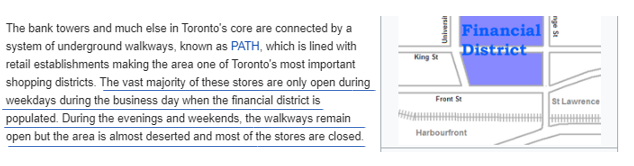

In [54]:
from IPython. display import Image
Image(filename="19.png",width = 1000, height=300)


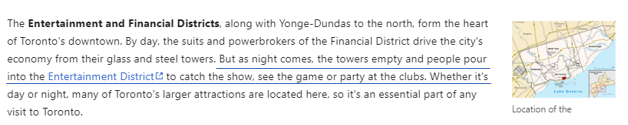

In [52]:
Image(filename="18.png",width=1000,height=300)

What we can see from the two websites is that during the evenings and weekends, the businesses and shops in the Financial District are closed and the area is almost deserted. Even during the weekdays, as the night comes, people leave the Financial District and pour into the Entertainment District for the food, the fun and the entertainment. This is a cultural, lifestyle and psychographic information that data cannot tell us, but nonethelss too important for ANY business owner to ignore. A well-rounded decision should take such information into account and that's what we are trying to do here. We will combine the insights from data and cultural and lifestyle information to make a well-rounded recommendation on the best location for a high-end asian restaurant in Downtown Toronto.

Next, we are going to examine one of the most important factor when choosing a location for a restaurant: accesibility / parking.

#### Parking / Accessibility

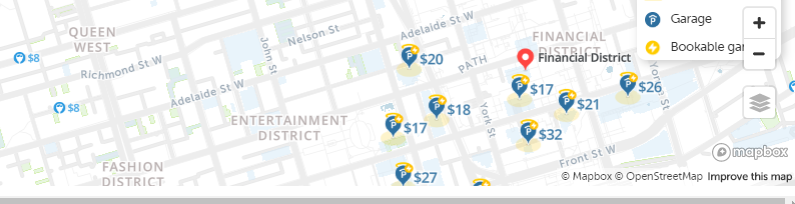

In [55]:
Image(filename="20.png",width=1000,height=300)

This map show parking in the Financial District and Entertainment District. Finding parking is a challenge in Downtown Toronto. A lot of the parking is fee-based parking. The rates shown are two-hour rate. In general, free parking is very limited throughout Toronto.

#### Average income in the Financial / Entertainment Districts

The following information is based on past census.

<ul>
    <li> Average income in Entertainment District.</li>
 </ul>

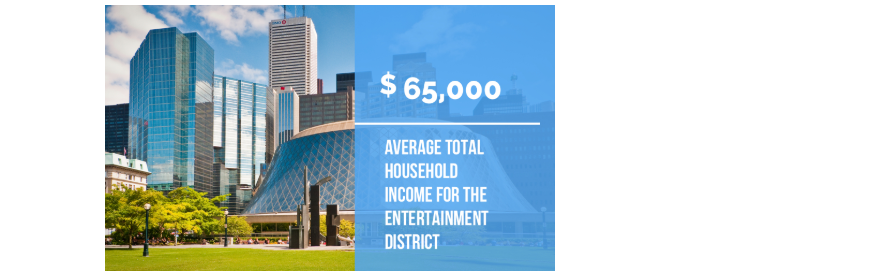

In [57]:
Image(filename="21.png",width=1000,height=300)

<ul>
    <li> Average income in Financial District. </li>
 </ul>

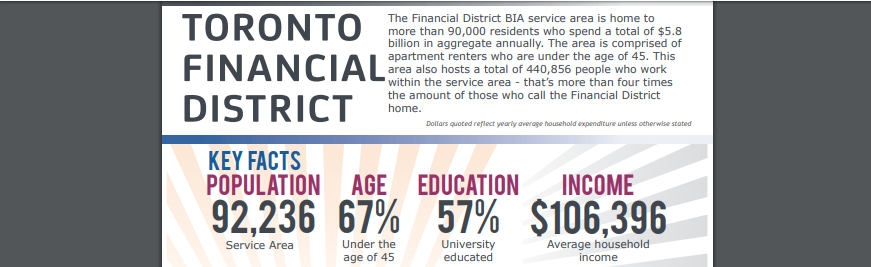

In [58]:
Image(filename="22.png",width=1000,height=300)

### IV: Summary of results

<ul>
    <li> There are 40 restaurants/asian restaurants in Downtown Toronoto. This number does not even include other eateries such as bars and bistros. Downtown Toronto, in addition to its other roles, is a hot spot for gourmet food in Toronto. </li> <br>
    <li> Most of the asian restaurants in Downtown Toronto are concentrated in Chinatown and Little Tokyo, whereas in other areas such as the Financial District and the Entertainment District, it is not as saturated as in Chinatown and Little Tokyo. </li> <br>
    <li> Most of the trending venues in the Financial District are businesses and shops that close in the evening and during the weekends, while the trending venues in the Entertainment District are culinary establishments, pubs and other recreations that thrive when the night comes and people leave the financial district and pour into the Entertainment District.</li> <br>
    <li> There are plenty of accessible parking, although not free, in the Financial District and Entertainment District, especially in ther intersection of the two districts. </li><br>
    <li> Both the Entertainment District and Financial District are high-income neighbourhoods. </li><br>
</ul>

### V: Discussions

#### Based on the analysis on the data and other non-data critical information, we recommend the high-end asian restaurant to be open in the side of the Entertainment District that is closed to the Financial District.

The new restaurant will target young, middle-aged customers with income in the higher range, a group of the population with financial freedom. Ideally, we would like the new restaurants to be situated where its target market lives, works and / or plays.

Initial analysis on the data shows that Chinatown or Little Tokyo might be good candidate locations. However, those two neighborhoods are already saturated with Asian restaurants. It is unlikely that people in those two neighborhoods have appetite for a high-end restaurant where the menu prices might be higher than at the restaurant around the corner of the street. 

I therefore narrowed down the choices to the Financial District and the Entertainment District. The data showed that while both districts are equally populated with restaurants, the Entertainment District is more saturated with Asian restaurants than the Financial District. Saturation often implies fierce competition.

Furthermore, the average income in the Financial District is much higher than the average income in the Entertainment District. It seems that people in the Financial District is more likely (and may be more frequently as well) to dine at a high-end restaurant, due to their financial freedom. 

However, there are some cultural and lifestyle aspects that must be taken into account when considering whether to open the high-end restaurant in Financial District or Entertainment District. It is true that the Financial District is not as saturated with Asian restaurants as the Entertainment District; it is also an economic powerhouse, full of customers capable to frequently dine at a high-end restaurant. However, that is during the working hours. As night falls, people leave the Financial District and pour into the Entertainment District for the shows and parties. In the evenings and during the weekends, the walkways in the Financial District are almost deserted. These cultural and lifestyle aspects make the Financial District less than ideal. The evenings, especially 6:00 PM to 9:00 PM are considered to be the Golden Hours for restaurant businesses. The Golden Hours are exactly when people leave the Financial District and flock into the Entertainment District. Furthermore, past surveys showed that the higher a customer's income, the less likely the customer will spend money on afternoon meal, a meal the customer has during his working hours in the Financial District. 


### VI: Conclusion

All things considered, I do not recommend opening the high-end asian restaurant in the Financial District. A well-rounded business decision should take all factors into consideration, especially the factors that have a direct impact on the business. I recommend opening it on side of the Entertainment District that is near the Financial District. More specifically, I recommend situating the new high-end Asian restaurant on or near the University Avenue. This is where the Entertainment District and Financial District connect with a lot of landmarks in the vicinity, Hotel Fairmont Royal York, InterContinetal Toronto Centre, Ritz Carlton Toronto, Toronto Symphony Orchestra, Shangri-La Hotel Toronto, just to name a few. This is very business area with high foot and vehicle traffic, which translates into high visibility for the new high-end Asian restaurant. In addition to the high visibility that is desired, this is also an area that supports the business concept of the restaurant: a high-end Asian restaurant that serves gourmet Asian food to young and middle-aged customers with income in the higher range. 

Finally, I strongly recommend talking a walk and chat with people to learn more about the area
